In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

# import nelpy as nel
import numpy as np
import scipy.signal
from matplotlib.path import Path
from matplotlib.widgets import LassoSelector
from numba import jit
from scipy.signal import hilbert
from sklearn.decomposition import PCA

import neuro_py as npy

In [2]:
basepath = r"U:\data\hpc_ctx_project\HP15\hp15_day44_20250214"
lfp = npy.io.LFPLoader(basepath)
ripple_ch = 41
sharp_wave_ch = 32
noise_ch = 193
fs = lfp.fs

ripple_signal = np.array(lfp.lfp.data[ripple_ch, :])
sharp_wave_signal = np.array(lfp.lfp.data[sharp_wave_ch, :])
noise_signal = np.array(lfp.lfp.data[noise_ch, :])

c:\Users\Cornell\anaconda3\envs\hpc_ctx_py_3_11\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


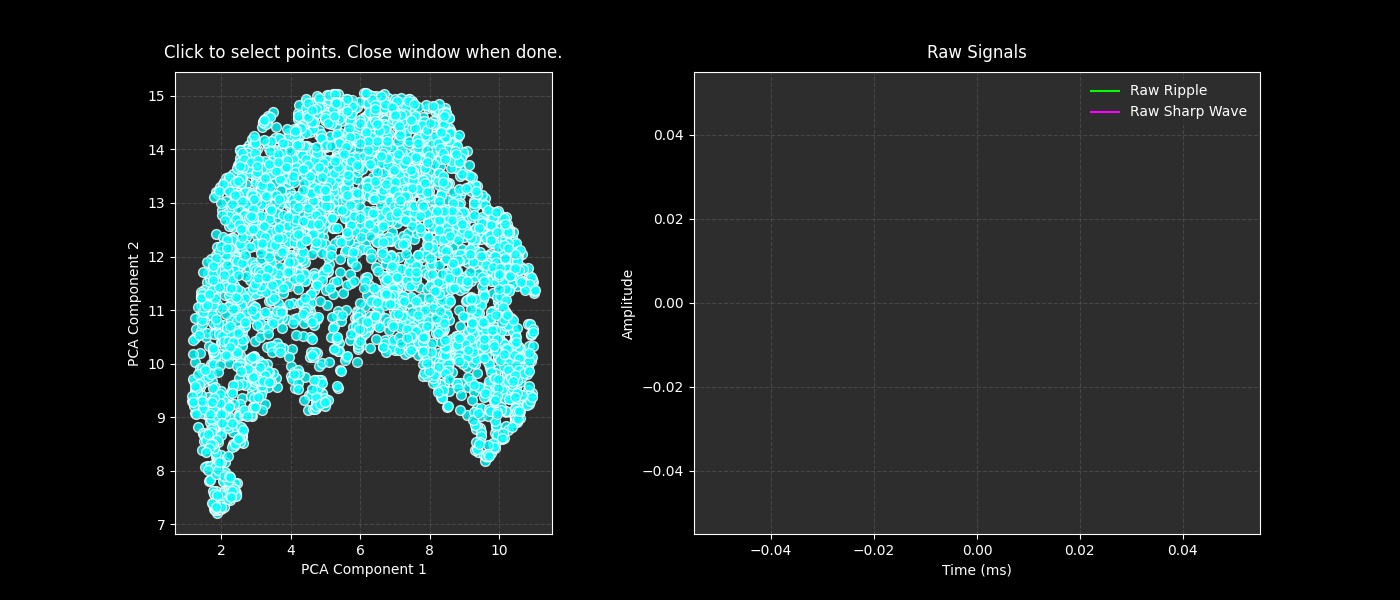

[[6.55554773e+00 6.61983660e+00]
 [4.03334084e+01 4.03726819e+01]
 [4.15904487e+01 4.16193593e+01]
 ...
 [2.21057013e+04 2.21057317e+04]
 [2.21242106e+04 2.21242398e+04]
 [2.21356699e+04 2.21357481e+04]]


In [40]:
%matplotlib widget
swr_intervals, peak_times, peak_amplitudes = npy.detectors.swr_detector(
    ripple_signal,
    sharp_wave_signal,
    fs,
    noise_signal,
    ripple_peak_threshold=0.5,
    sharp_wave_peak_threshold=0.5,
    clean_lfp = True
)
print(swr_intervals)

In [41]:
import nelpy as nel
npy.io.epoch_to_mat(nel.EpochArray(swr_intervals), basepath, 'ripples_test')